# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
#Import Necessary Libraries

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# The Dataset
> ***Brief Description:***
My project is about predicting maternal health risks using machine learning. I got my dataset from [kaggle](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data) and it was collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system. It includes features such as blood pressure, heart rate, and age, helping in the early detection of potential complications during pregnancy.

In [ ]:
df = pd.read_csv("./datasets/Maternal_Health_Risk_Data_Set.csv")

df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


From the above, we see that there are no missing values in the dataset.

In [ ]:
# I encoded the risk levels with numerical values
encoder = OrdinalEncoder(categories=[["low risk", "mid risk", "high risk"]])

# Fit and transform the data
df['RiskLevel'] = encoder.fit_transform(df[['RiskLevel']]).astype(int)

In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,2
1,35,140,90,13.00,98.0,70,2
2,29,90,70,8.00,100.0,80,2
3,30,140,85,7.00,98.0,70,2
4,35,120,60,6.10,98.0,76,0
5,23,140,80,7.01,98.0,70,2
6,23,130,70,7.01,98.0,78,1
7,35,85,60,11.00,102.0,86,2
8,32,120,90,6.90,98.0,70,1
9,42,130,80,18.00,98.0,70,2


In [ ]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


<Axes: >

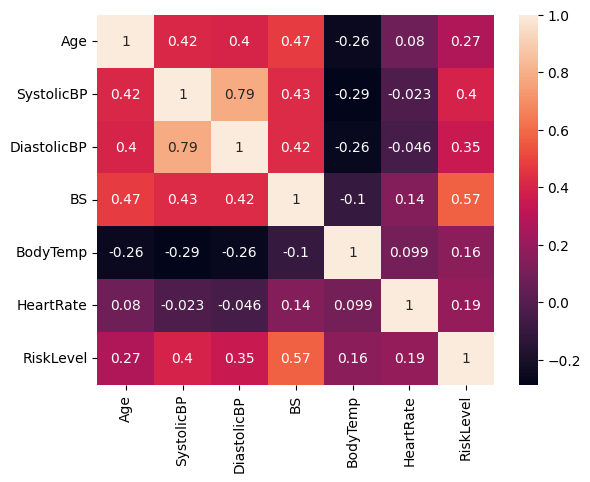

In [ ]:
# Let's show the heatmap to visualize the how related the columns are (most epecially to the risk level column).
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


In [ ]:
df['RiskLevel'].value_counts()

,count
RiskLevel,
0,406
1,336
2,272


From the above, we see that there's a class imbalance and to handle this issue, we would have to stratisfy during the splitting process

In [ ]:
# Split the dataframe into test, train and validation sets and then Standardize it.

X = df.drop(['RiskLevel'], axis = 1)
y = df['RiskLevel']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
S_scaler = StandardScaler()
X_train = S_scaler.fit_transform(X_train)
X_test = S_scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 1.35260099  0.36279431  0.26138266  0.72921028 -0.4887467   1.67002124]
 [-0.36321887  0.36279431  0.26138266 -0.23484441 -0.4887467  -0.97186429]
 [ 0.75579408  0.36279431  1.33840882  0.72921028 -0.4887467   0.70933559]
 ...
 [ 1.50180272  0.36279431  0.26138266 -0.26594294 -0.4887467  -0.49152146]
 [ 2.24781136 -1.26415802 -0.81564351 -0.54582979 -0.4887467   0.34907848]
 [ 2.69541654 -1.53531675 -1.17465224 -0.54582979 -0.4887467   1.42984983]]


```
Model Architecture:
```

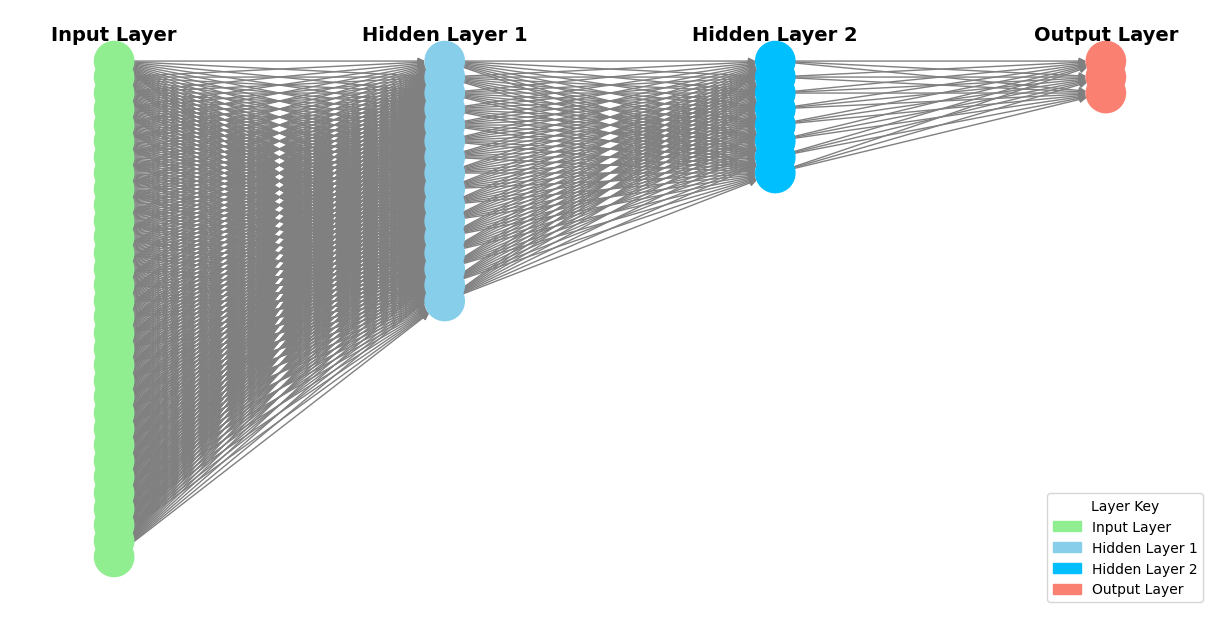

#Model 1: Without Any Optimization Technique





#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
def get_optimizer(optimizer: str, learning_rate: float):
    optimizers = {
        "adam": Adam(learning_rate=learning_rate),
        "sgd": SGD(learning_rate=learning_rate),
        "rmsprop": RMSprop(learning_rate=learning_rate)
    }
    return optimizers.get(optimizer.lower(), Adam(learning_rate=learning_rate))

def get_regularizer(reg_type: str, value: float):
    regularizers = {
        "l1": l1(value),
        "l2": l2(value),
        "l1_l2": l1_l2(value, value)
    }
    return regularizers.get(reg_type.lower(), None) if reg_type else None


def define_model(optimizer: str, regularization_type: str = None,
                 regularization_value: float = 0.01, early_stopping: bool = False,
                 dropout: float = 0.0, learning_rate: float = 0.001,
                 input_shape: int = None, num_classes: int = 3):

    model = Sequential()

    # Input Layer
    model.add(Dense(64, activation='relu', input_shape=input_shape,
                    kernel_regularizer=get_regularizer(regularization_type, regularization_value)))

    # Hidden Layers with Dropout
    model.add(Dense(32, activation='relu', kernel_regularizer=get_regularizer(regularization_type, regularization_value)))

    model.add(Dense(16, activation='relu', kernel_regularizer=get_regularizer(regularization_type, regularization_value)))

    if dropout > 0:
        model.add(Dropout(dropout))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    optimizer_instance = get_optimizer(optimizer, learning_rate)

    model.compile(optimizer=optimizer_instance, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_loss', patience=5)] if early_stopping else []

    return model, callbacks

In [ ]:
model_1, model_1_callbacks = define_model(optimizer="none", input_shape=X_train.shape[1:], num_classes=3) # I put in None here. Although my get_optimizer function defaults to using Adam optimization.

In [ ]:
model_1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,107 (12.14 KB)

 Trainable params: 3,107 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1_history = model_1.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks=model_1_callbacks)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3891 - loss: 1.0684 - val_accuracy: 0.3529 - val_loss: 1.0009
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5063 - loss: 0.9447 - val_accuracy: 0.5163 - val_loss: 0.9433
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6409 - loss: 0.8696 - val_accuracy: 0.5621 - val_loss: 0.9013
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6554 - loss: 0.8558 - val_accuracy: 0.6013 - val_loss: 0.8732
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6751 - loss: 0.8044 - val_accuracy: 0.5882 - val_loss: 0.8360
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7059 - loss: 0.7512 - val_accuracy: 0.6013 - val_loss: 0.8138
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7175 - loss: 0.6916 - val_accuracy: 0.5686 - val_loss: 0.7997
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 0.7125 - val_accuracy: 0.601

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
def loss_curve_plot(history):
    """
    Plots the training and validation loss curves.

    Parameters:
        history (History object): The history returned from model.fit(), which contains loss values.
    """
    if not history or 'loss' not in history.history or 'val_loss' not in history.history:
        print("Error: Invalid history object. Ensure model.fit() has been called.")
        return

    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r^-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained classification model and prints evaluation metrics.

    Parameters:
    - model: Trained machine learning model.
    - X_test: Test feature set.
    - y_test: True labels for the test set.

    Outputs:
    - Confusion matrix visualization.
    - Accuracy, Precision, Recall, and F1-score.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    if y_pred.ndim == 2 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)

    if y_test.ndim == 2:
        y_test = np.argmax(y_test, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

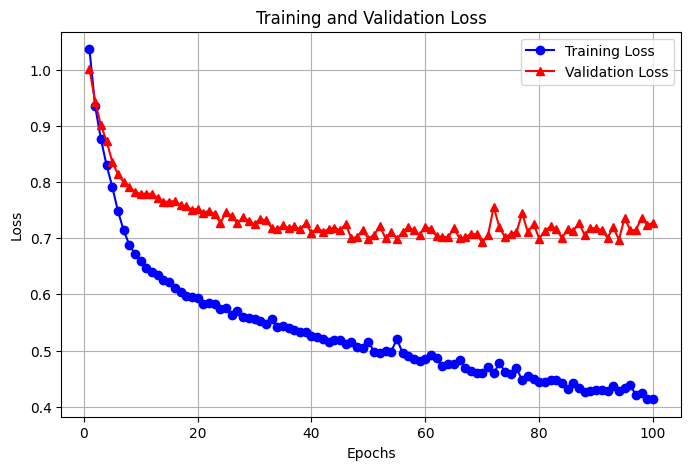

In [ ]:
loss_curve_plot(model_1_history)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion Matrix:
 [[33 27  1]
 [14 31  6]
 [ 1  5 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.54      0.61        61
           1       0.49      0.61      0.54        51
           2       0.83      0.85      0.84        41

    accuracy                           0.65       153
   macro avg       0.67      0.67      0.66       153
weighted avg       0.66      0.65      0.65       153


Accuracy Score: 0.6470588235294118


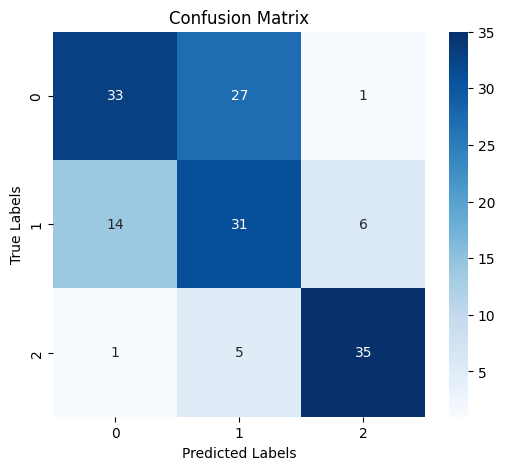

In [ ]:
evaluate_model(model_1, X_test, y_test)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

## MODEL 2: Using Adam Optimizer and l1 regularization

In [ ]:
model_2, model_2_callbacks = define_model(
  optimizer="Adam",
  input_shape=X_train.shape[1:],
  num_classes=3,
  regularization_type="l1",
  regularization_value=0.001,
  early_stopping=True,
  dropout=0.2,
)
model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,107 (12.14 KB)

 Trainable params: 3,107 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2_history = model_2.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks=model_2_callbacks)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5814 - loss: 1.2431 - val_accuracy: 0.6144 - val_loss: 1.1751
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6190 - loss: 1.1507 - val_accuracy: 0.6078 - val_loss: 1.1305
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6261 - loss: 1.1364 - val_accuracy: 0.6013 - val_loss: 1.0962
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6616 - loss: 1.0616 - val_accuracy: 0.6144 - val_loss: 1.0886
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6490 - loss: 1.0603 - val_accuracy: 0.5948 - val_loss: 1.0702
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6836 - loss: 1.0419 - val_accuracy: 0.6078 - val_loss: 1.0622
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6722 - loss: 0.9967 - val_accuracy: 0.6013 - val_loss: 1.0484
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6773 - loss: 0.9834 - val_accuracy: 0.6144 - v

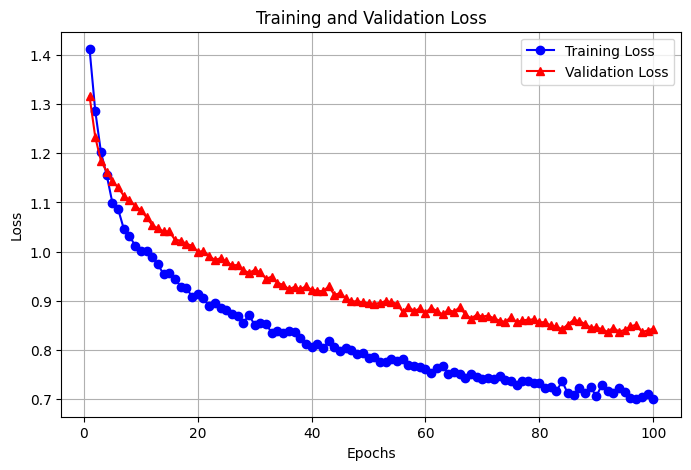

In [ ]:
loss_curve_plot(model_2_history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix:
 [[49 11  1]
 [33 11  7]
 [ 1  2 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68        61
           1       0.46      0.22      0.29        51
           2       0.83      0.93      0.87        41

    accuracy                           0.64       153
   macro avg       0.62      0.65      0.62       153
weighted avg       0.61      0.64      0.60       153


Accuracy Score: 0.6405228758169934


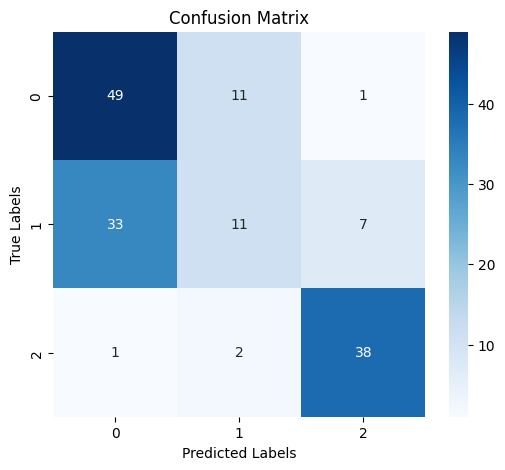

In [ ]:
evaluate_model(model_2, X_test, y_test)

## Model 3: Using Adam optimizer and l2 regularizer

In [ ]:
model_3, model_3_callbacks = define_model(
  optimizer="Adam",
  input_shape=X_train.shape[1:],
  num_classes=3,
  regularization_type="l2",
  regularization_value=0.001,
  early_stopping=True,
  dropout=0.2,
)
model_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,107 (12.14 KB)

 Trainable params: 3,107 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3_history = model_3.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks=model_3_callbacks)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4338 - loss: 1.1563 - val_accuracy: 0.5359 - val_loss: 1.0883
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5687 - loss: 1.0541 - val_accuracy: 0.5882 - val_loss: 1.0123
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5611 - loss: 0.9862 - val_accuracy: 0.5948 - val_loss: 0.9360
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.8906 - val_accuracy: 0.6144 - val_loss: 0.8859
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6296 - loss: 0.8543 - val_accuracy: 0.6209 - val_loss: 0.8586
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6600 - loss: 0.8029 - val_accuracy: 0.6209 - val_loss: 0.8500
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6894 - loss: 0.7833 - val_accuracy: 0.6078 - val_loss: 0.8486
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6378 - loss: 0.8412 - val_accuracy: 0.6209 - 

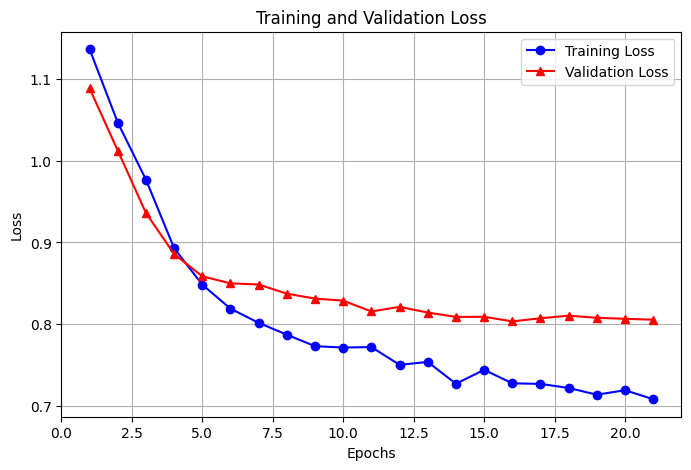

In [ ]:
loss_curve_plot(model_3_history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Confusion Matrix:
 [[49 11  1]
 [34  9  8]
 [ 2  3 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.80      0.67        61
           1       0.39      0.18      0.24        51
           2       0.80      0.88      0.84        41

    accuracy                           0.61       153
   macro avg       0.59      0.62      0.58       153
weighted avg       0.57      0.61      0.57       153


Accuracy Score: 0.6143790849673203


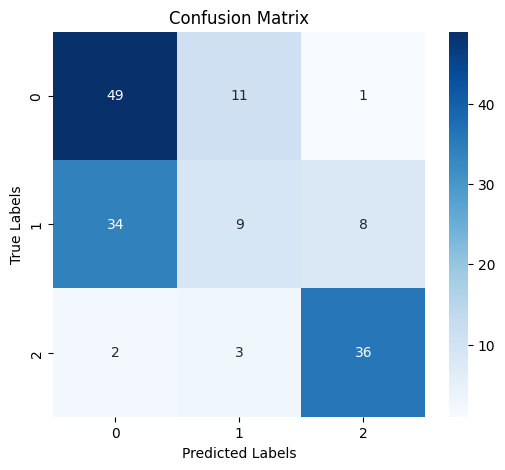

In [ ]:
evaluate_model(model_3, X_test, y_test)

## Model 4: Using RMSPop and l1_l2 regularization

In [ ]:
model_4, model_4_callbacks = define_model(
  optimizer="RMSPop",
  input_shape=X_train.shape[1:],
  num_classes=3,
  regularization_type="l1_l2",
  regularization_value=0.001,
  early_stopping=True,
  dropout=0.2,
)
model_4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,107 (12.14 KB)

 Trainable params: 3,107 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4_history = model_4.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks=model_4_callbacks)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4328 - loss: 1.5411 - val_accuracy: 0.5752 - val_loss: 1.4342
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 1.4087 - val_accuracy: 0.6078 - val_loss: 1.3251
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 1.2919 - val_accuracy: 0.6209 - val_loss: 1.2652
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6155 - loss: 1.2908 - val_accuracy: 0.6209 - val_loss: 1.2216
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6841 - loss: 1.1695 - val_accuracy: 0.6078 - val_loss: 1.1930
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6877 - loss: 1.1443 - val_accuracy: 0.5948 - val_loss: 1.1684
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6540 - loss: 1.1278 - val_accuracy: 0.6209 - val_loss: 1.1492
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7022 - loss: 1.1048 - val_accuracy: 0.6144 - 

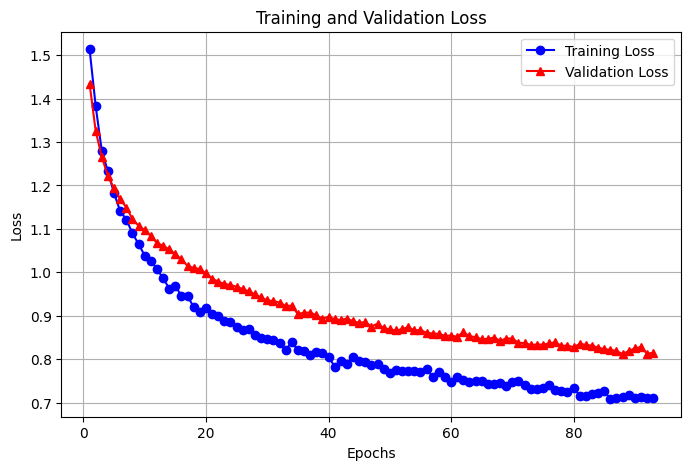

In [ ]:
loss_curve_plot(model_4_history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
 [[50 10  1]
 [34 10  7]
 [ 1  3 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.82      0.68        61
           1       0.43      0.20      0.27        51
           2       0.82      0.90      0.86        41

    accuracy                           0.63       153
   macro avg       0.62      0.64      0.61       153
weighted avg       0.60      0.63      0.59       153


Accuracy Score: 0.6339869281045751


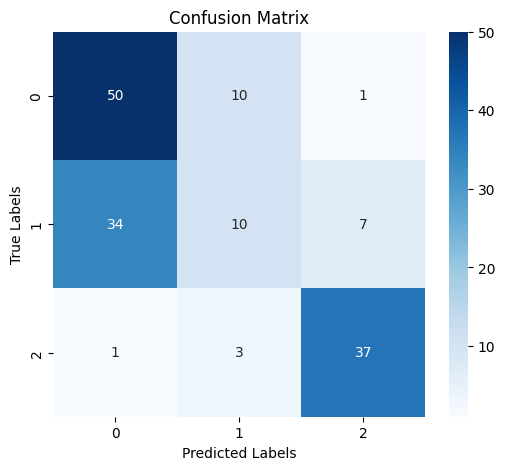

In [ ]:
evaluate_model(model_4, X_test, y_test)

## Model 5: Using RMSPop and l2 regularization

In [120]:
model_5, model_5_callbacks = define_model(
  optimizer="RMSPop",
  input_shape=X_train.shape[1:],
  num_classes=3,
  regularization_type="l1_l2",
  regularization_value=0.001,
  early_stopping=True,
  dropout=0.2,
)
model_5.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,107 (12.14 KB)

 Trainable params: 3,107 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model_5_history = model_5.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks=model_5_callbacks)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5014 - loss: 1.5147 - val_accuracy: 0.5948 - val_loss: 1.4091
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6280 - loss: 1.3761 - val_accuracy: 0.6078 - val_loss: 1.3210
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6210 - loss: 1.3152 - val_accuracy: 0.6340 - val_loss: 1.2712
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 1.2201 - val_accuracy: 0.6340 - val_loss: 1.2297
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6999 - loss: 1.1626 - val_accuracy: 0.6144 - val_loss: 1.2005
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6833 - loss: 1.1447 - val_accuracy: 0.6144 - val_loss: 1.1738
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6857 - loss: 1.0866 - val_accuracy: 0.6144 - val_loss: 1.1578
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6890 - loss: 1.0664 - val_accuracy: 0.6078 - 

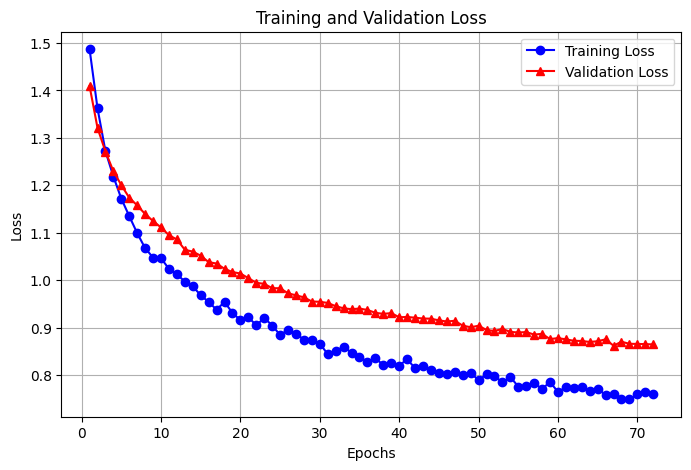

In [122]:
loss_curve_plot(model_5_history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Confusion Matrix:
 [[47 13  1]
 [34 10  7]
 [ 1  3 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.77      0.66        61
           1       0.38      0.20      0.26        51
           2       0.82      0.90      0.86        41

    accuracy                           0.61       153
   macro avg       0.59      0.62      0.59       153
weighted avg       0.58      0.61      0.58       153


Accuracy Score: 0.6143790849673203


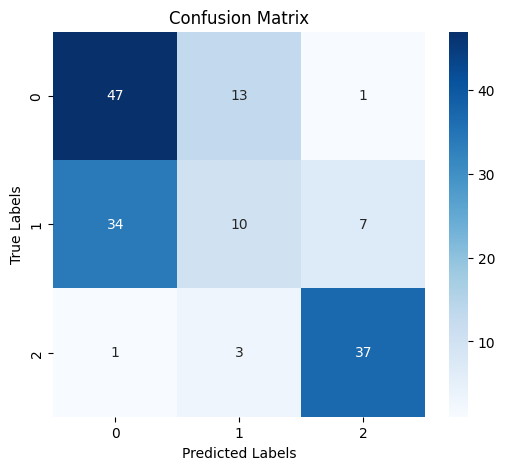

In [123]:
evaluate_model(model_5, X_test, y_test)

## Now, let's save All the Neural Network models

In [124]:
pickle.dump(model_1, open('./saved_models/pregnancy_health_risk_model1.pkl', 'wb'))
pickle.dump(model_2, open('./saved_models/pregnancy_health_risk_model2.pkl', 'wb'))
pickle.dump(model_3, open('./saved_models/pregnancy_health_risk_model3.pkl', 'wb'))
pickle.dump(model_4, open('./saved_models/pregnancy_health_risk_model4.pkl', 'wb'))
pickle.dump(model_5, open('./saved_models/pregnancy_health_risk_model5.pkl', 'wb'))

## Model 6 (Traditional ML Model): Using Random forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Confusion Matrix:
 [[49 12  0]
 [14 33  4]
 [ 1  4 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78        61
           1       0.67      0.65      0.66        51
           2       0.90      0.88      0.89        41

    accuracy                           0.77       153
   macro avg       0.78      0.78      0.78       153
weighted avg       0.77      0.77      0.77       153


Accuracy Score: 0.7712418300653595


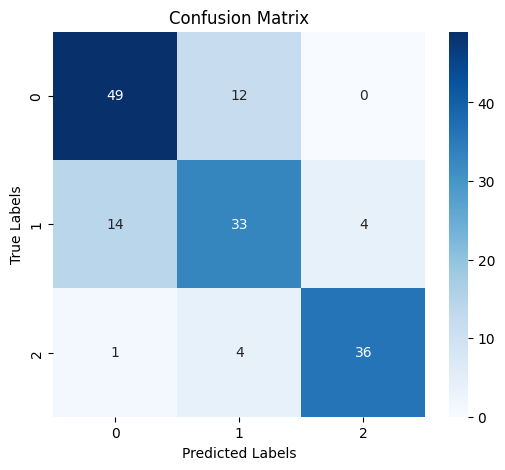

In [ ]:
evaluate_model(best_rf, X_test, y_test)

## Looking at all the five models, we see that the Random forest model was the best model with an Accuracy of 77%

In [125]:
#Save the Random forest model
pickle.dump(best_rf, open('./saved_models/pregnancy_health_risk_model6.pkl', 'wb'))


# Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
import joblib
import numpy as np

def make_predictions(model_path, X, return_probabilities=False):
    model = joblib.load(model_path)

    if return_probabilities:
        predictions = model.predict_proba(X)
    else:
        predictions = model.predict(X)

    return predictions

In [128]:
model_path = "./saved_models/pregnancy_health_risk_model6.pkl"

predictions = make_predictions(
  model_path,
  [
      [25, 130, 80, 15, 98, 86]
  ]
)

print("Predictions:", predictions)

Predictions: [2]
